First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000    

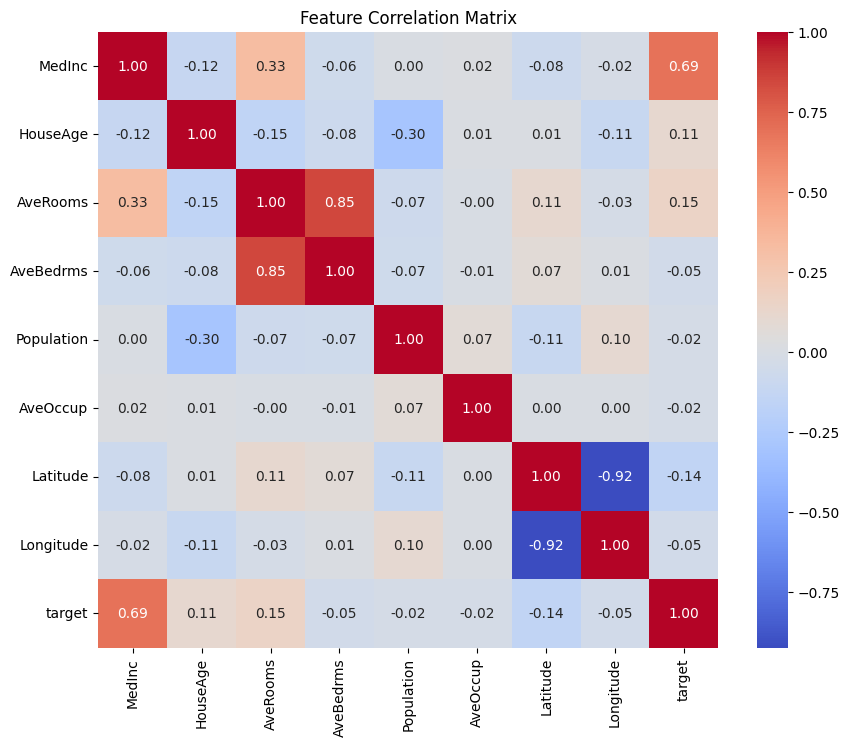


Mean Squared Error (MSE): 0.555891598695244
R² Score: 0.5757877060324511

Cross-Validation R² Scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Mean Cross-Validation R² Score: 0.5530311140279561


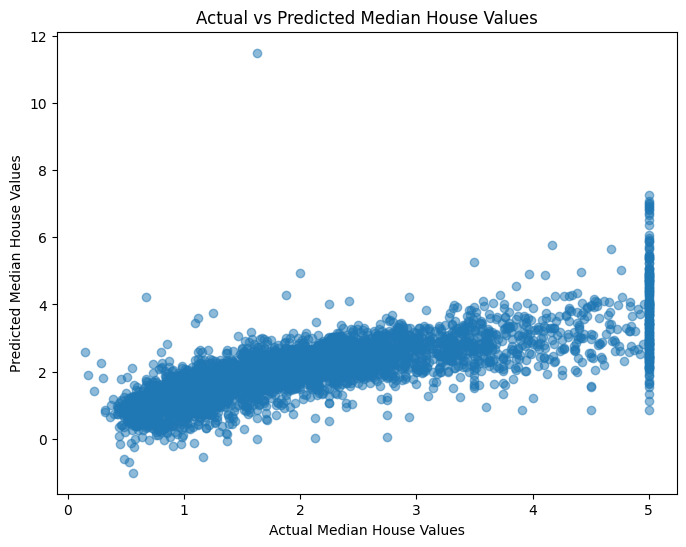

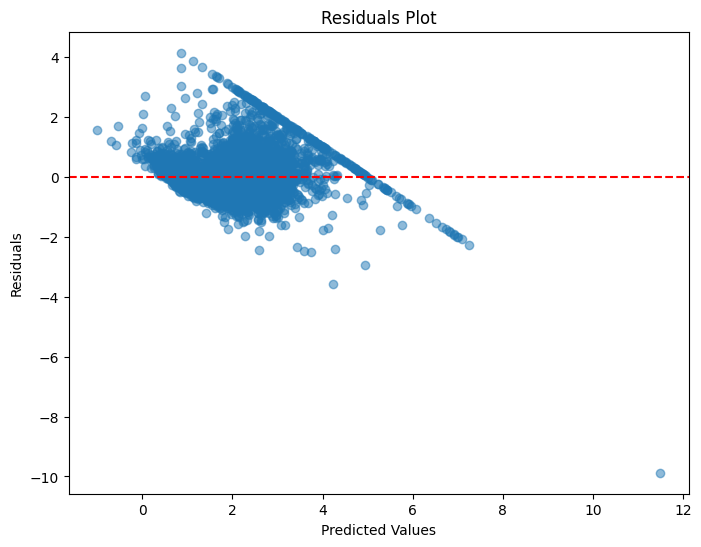

In [2]:
# Step 1: Setup and Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load and Explore the Dataset
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Target variable is the median house value

# Display first few rows and basic statistics
print("First few rows of the dataset:")
print(df.head())
print("\nDataset statistics:")
print(df.describe())

# Plot a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Step 3: Data Preprocessing
# Define features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

# Optionally, scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Model Selection and Training
# Using Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Prediction and Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Step 7: Cross-Validation
# Perform 5-fold cross-validation on the full dataset
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("\nCross-Validation R² Scores:", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))

# Step 8: Visualization of Results
# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Values")
plt.ylabel("Predicted Median House Values")
plt.title("Actual vs Predicted Median House Values")
plt.show()

# Additional Visualization: Residual Plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()
